# Application Behavior Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(" INTERNEE.PK APPLICANT BEHAVIOR ANALYSIS")
print("=" * 60)

# Load data
try:
    applicants = pd.read_csv('applicant_demographics.csv')
    sessions = pd.read_csv('user_sessions.csv')
    pageviews = pd.read_csv('pageview_analytics.csv')
    funnel = pd.read_csv('conversion_funnel.csv')
    print(" Data loaded successfully!")
except:
    print(" Please generate dataset first using your original code")
    exit()
# BASIC ANALYSIS
print("\n" + "="*50)
print(" BASIC METRICS")
print("="*50)

# 1. Key Metrics
total_applicants = applicants['user_id'].nunique()
total_sessions = sessions['session_id'].nunique()
total_pageviews = len(pageviews)
conversion_rate = (sessions['application_submitted'].sum() / total_applicants) * 100

print(f"• Total Applicants: {total_applicants:,}")
print(f"• Total Sessions: {total_sessions:,}")
print(f"• Total Pageviews: {total_pageviews:,}")
print(f"• Conversion Rate: {conversion_rate:.1f}%")

# 2. User Segment Analysis
print(f"\n USER SEGMENT ANALYSIS")
segment_conversion = sessions.groupby('user_id')['application_submitted'].max()
segment_data = applicants.merge(segment_conversion, on='user_id')
segment_summary = segment_data.groupby('user_segment').agg({
    'user_id': 'count',
    'application_submitted': 'mean'
}).round(3)
segment_summary.columns = ['users', 'conversion_rate']
segment_summary['conversion_pct'] = (segment_summary['conversion_rate'] * 100).round(1)
print(segment_summary[['users', 'conversion_pct']])

# 3. Traffic Source Performance
print(f"\n TRAFFIC SOURCE PERFORMANCE")
traffic_summary = segment_data.groupby('traffic_source').agg({
    'user_id': 'count',
    'application_submitted': 'mean'
}).round(3)

traffic_summary.columns = ['visitors', 'conversion_rate']
traffic_summary['conversion_pct'] = (traffic_summary['conversion_rate'] * 100).round(1)
print(traffic_summary[['visitors', 'conversion_pct']].sort_values('conversion_pct', ascending=False))

# 4. Device Performance
print(f"\n DEVICE PERFORMANCE")
device_summary = segment_data.groupby('primary_device').agg({
    'user_id': 'count',
    'application_submitted': 'mean'
}).round(3)
device_summary.columns = ['users', 'conversion_rate']
device_summary['conversion_pct'] = (device_summary['conversion_rate'] * 100).round(1)
print(device_summary[['users', 'conversion_pct']])

# 5. Session Metrics
print(f"\n SESSION BEHAVIOR")
avg_session_duration = sessions['session_duration_seconds'].mean() / 60
avg_pages_per_session = sessions['pages_viewed'].mean()
bounce_rate = (sessions['is_bounce'].sum() / len(sessions)) * 100

print(f"• Avg Session Duration: {avg_session_duration:.1f} min")
print(f"• Avg Pages/Session: {avg_pages_per_session:.1f}")
print(f"• Bounce Rate: {bounce_rate:.1f}%")

# 6. Page Performance
print(f"\n TOP PAGES BY ENGAGEMENT")
page_summary = pageviews.groupby('page_url').agg({
    'pageview_id': 'count',
    'time_on_page_seconds': 'mean',
    'is_exit': 'mean'
}).round(2)
page_summary.columns = ['pageviews', 'avg_time_sec', 'exit_rate']
page_summary = page_summary.sort_values('pageviews', ascending=False)
print(page_summary.head(8))

 INTERNEE.PK APPLICANT BEHAVIOR ANALYSIS
 Data loaded successfully!

 BASIC METRICS
• Total Applicants: 3,000
• Total Sessions: 13,073
• Total Pageviews: 131,927
• Conversion Rate: 76.3%

 USER SEGMENT ANALYSIS
                    users  conversion_pct
user_segment                             
Career_Starter        712            75.0
Experience_Builder    774            96.1
Skill_Explorer        723            31.7
Urgent_Seeker         791            99.0

 TRAFFIC SOURCE PERFORMANCE
                   visitors  conversion_pct
traffic_source                             
Blog                    365            77.0
Referral                391            77.0
University Portal       376            76.9
Email Campaign          351            76.6
Google Search           382            76.2
Career Fair             380            75.8
Social Media            382            75.7
Direct                  373            75.6

 DEVICE PERFORMANCE
                users  conversion_pct
primary_d

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(" INTERNEE.PK APPLICANT BEHAVIOR ANALYSIS")
print("=" * 60)

# Load data
try:
    applicants = pd.read_csv('applicant_demographics.csv')
    sessions = pd.read_csv('user_sessions.csv')
    pageviews = pd.read_csv('pageview_analytics.csv')
    funnel = pd.read_csv('conversion_funnel.csv')
    print(" Data loaded successfully!")
except:
    print(" Please generate dataset first using your original code")
    exit()
# 1. APPLICATION FLOW ANALYSIS
print("\n APPLICATION FLOW ANALYSIS")
print("-" * 40)

# User journey patterns
application_flow = pageviews.groupby('user_id').agg({
    'page_url': list,
    'session_id': 'nunique',
    'time_on_page_seconds': 'sum'
}).rename(columns={
    'page_url': 'journey_path',
    'session_id': 'total_sessions',
    'time_on_page_seconds': 'total_time_seconds'
})

# Add conversion info
user_conversions = sessions.groupby('user_id')['application_submitted'].max()
application_flow = application_flow.join(user_conversions)

print("Top 5 Common User Journeys for Converters:")
converter_journeys = application_flow[application_flow['application_submitted'] == True]
common_paths = converter_journeys['journey_path'].apply(tuple).value_counts().head(5)

for i, (path, count) in enumerate(common_paths.items(), 1):
    print(f"{i}. {path[:3]}... → Conversions: {count}")

# 2. BOTTLENECK IDENTIFICATION
print("\n BOTTLENECK IDENTIFICATION")
print("-" * 40)

# Exit point analysis
exit_analysis = pageviews[pageviews['is_exit'] == True].groupby('page_url').agg({
    'pageview_id': 'count',
    'user_id': 'nunique'
}).rename(columns={'pageview_id': 'total_exits', 'user_id': 'unique_users_exiting'})

exit_analysis['exit_rate'] = (exit_analysis['total_exits'] / len(pageviews[pageviews['is_exit'] == True])).round(3)
exit_analysis = exit_analysis.sort_values('exit_rate', ascending=False)

print("Top 5 Exit Points (Bottlenecks):")
for page, row in exit_analysis.head(5).iterrows():
    print(f"• {page}: {row['exit_rate']:.1%} of all exits")

# 3. CONVERSION FUNNEL ANALYSIS
print("\n CONVERSION FUNNEL BOTTLENECKS")
print("-" * 40)

# Define funnel stages
def get_funnel_stage(page_sequence):
    if 'application_form' in page_sequence and 'resume_upload' in page_sequence:
        return 'Completed Application'
    elif 'application_form' in page_sequence:
        return 'Started Application'
    elif 'internship_details' in page_sequence:
        return 'Evaluating Internships'
    elif 'internship_listings' in page_sequence:
        return 'Browsing Listings'
    else:
        return 'Awareness'

application_flow['funnel_stage'] = application_flow['journey_path'].apply(get_funnel_stage)

funnel_stages = ['Awareness', 'Browsing Listings', 'Evaluating Internships', 'Started Application', 'Completed Application']
funnel_counts = []

for stage in funnel_stages:
    stage_users = application_flow[application_flow['funnel_stage'] == stage].shape[0]
    funnel_counts.append(stage_users)

funnel_df = pd.DataFrame({
    'stage': funnel_stages,
    'users': funnel_counts,
    'dropoff_rate': [0] + [((funnel_counts[i-1] - funnel_counts[i]) / funnel_counts[i-1] * 100) for i in range(1, len(funnel_counts))]
})

for _, row in funnel_df.iterrows():
    print(f"• {row['stage']}: {row['users']} users | Dropoff: {row['dropoff_rate']:.1f}%")

# 4. PAGE PERFORMANCE FOR UX IMPROVEMENT
print("\n PAGE PERFORMANCE FOR UX ENHANCEMENT")
print("-" * 40)

page_performance = pageviews.groupby('page_url').agg({
    'pageview_id': 'count',
    'time_on_page_seconds': 'mean',
    'is_exit': 'mean',
    'is_bounce': 'mean',
    'user_id': 'nunique'
}).round(3)

page_performance = page_performance.rename(columns={
    'pageview_id': 'pageviews',
    'user_id': 'unique_users'
}).sort_values('pageviews', ascending=False)

print("Critical Pages for UX Improvement:")
critical_pages = page_performance[
    (page_performance['is_exit'] > 0.1) | 
    (page_performance['time_on_page_seconds'] < 30)
].head(5)

for page, row in critical_pages.iterrows():
    issues = []
    if row['is_exit'] > 0.1:
        issues.append(f"high exit rate ({row['is_exit']:.1%})")
    if row['time_on_page_seconds'] < 30:
        issues.append(f"low engagement ({row['time_on_page_seconds']:.0f}s)")
    
    print(f"• {page}: {', '.join(issues)}")

# 5. USER SEGMENT BEHAVIOR PATTERNS
print("\n USER SEGMENT BEHAVIOR PATTERNS")
print("-" * 40)

segment_analysis = applicants.merge(application_flow, on='user_id')
segment_performance = segment_analysis.groupby('user_segment').agg({
    'user_id': 'count',
    'application_submitted': 'mean',
    'total_sessions': 'mean',
    'total_time_seconds': 'mean'
}).round(3)

segment_performance['conversion_rate'] = (segment_performance['application_submitted'] * 100).round(1)
segment_performance['avg_time_minutes'] = (segment_performance['total_time_seconds'] / 60).round(1)

print("Segment Performance Insights:")
for segment, row in segment_performance.iterrows():
    print(f"• {segment}: {row['conversion_rate']}% conversion | {row['avg_time_minutes']}min avg time | {row['total_sessions']:.1f} avg sessions")

# 6. SQL-STYLE ANALYSIS QUERIES
print("\n KEY SQL-READY INSIGHTS")
print("-" * 40)

print("1. TOP CONVERSION PATHS:")
print("   SELECT page_sequence, COUNT(*) as conversions")
print("   FROM user_journeys WHERE application_submitted = true")
print("   GROUP BY page_sequence ORDER BY conversions DESC LIMIT 5")

print("\n2. HIGHEST EXIT PAGES:")
print("   SELECT page_url, COUNT(*) as exit_count")
print("   FROM pageviews WHERE is_exit = true") 
print("   GROUP BY page_url ORDER BY exit_count DESC LIMIT 5")

print("\n3. USER SEGMENT PERFORMANCE:")
print("   SELECT user_segment, AVG(conversion_rate) as segment_conversion")
print("   FROM applicants GROUP BY user_segment ORDER BY segment_conversion DESC")

# 7. ACTIONABLE RECOMMENDATIONS
print("\n ACTIONABLE RECOMMENDATIONS FOR INTERNEE.PK")
print("-" * 40)

recommendations = {
    "HIGH PRIORITY": [
        f"Fix {exit_analysis.index[0]} page - {exit_analysis.iloc[0]['exit_rate']:.1%} of users exit here",
        f"Optimize application form - {funnel_df[funnel_df['stage']=='Started Application']['dropoff_rate'].iloc[0]:.1f}% dropoff rate",
        f"Improve {critical_pages.index[0]} engagement - only {critical_pages.iloc[0]['time_on_page_seconds']:.0f}s average time"
    ],
    "MEDIUM PRIORITY": [
        f"Enhance {segment_performance['conversion_rate'].idxmin()} segment experience - only {segment_performance['conversion_rate'].min()}% conversion",
        "Add progress indicators in multi-page forms",
        "Implement smart suggestions based on user behavior"
    ],
    "LOW PRIORITY": [
        "A/B test page layouts for high-traffic pages",
        "Add tooltips and guidance for complex forms",
        "Implement personalized content recommendations"
    ]
}

for priority, items in recommendations.items():
    print(f"\n{priority}:")
    for item in items:
        print(f"  • {item}")

# 8. GOOGLE ANALYTICS-STYLE DASHBOARD METRICS
print("\n GOOGLE ANALYTICS-STYLE METRICS")
print("-" * 40)

metrics = {
    "Users": f"{applicants['user_id'].nunique():,}",
    "Sessions": f"{sessions['session_id'].nunique():,}",
    "Pageviews": f"{len(pageviews):,}",
    "Avg. Session Duration": f"{sessions['session_duration_seconds'].mean()/60:.1f} min",
    "Bounce Rate": f"{(sessions['is_bounce'].sum()/len(sessions)*100):.1f}%",
    "Conversion Rate": f"{(sessions['application_submitted'].sum()/applicants['user_id'].nunique()*100):.1f}%",
    "Pages/Session": f"{sessions['pages_viewed'].mean():.1f}",
}

for metric, value in metrics.items():
    print(f"• {metric}: {value}")

print("\n" + "=" * 60)
print(" ANALYSIS COMPLETE - READY FOR UX IMPROVEMENTS!")
print("=" * 60)

 INTERNEE.PK APPLICANT BEHAVIOR ANALYSIS
 Data loaded successfully!

 APPLICATION FLOW ANALYSIS
----------------------------------------
Top 5 Common User Journeys for Converters:
1. ('dashboard', 'application_form', 'profile_creation')... → Conversions: 2
2. ('homepage', 'internship_listings', 'internship_details')... → Conversions: 2
3. ('internship_details', 'application_form', 'profile_creation')... → Conversions: 2
4. ('application_form', 'resume_upload', 'dashboard')... → Conversions: 1
5. ('application_form', 'dashboard', 'profile_creation')... → Conversions: 1

 BOTTLENECK IDENTIFICATION
----------------------------------------
Top 5 Exit Points (Bottlenecks):
• application_form: 26.3% of all exits
• resume_upload: 17.2% of all exits
• profile_creation: 15.4% of all exits
• internship_details: 11.9% of all exits
• dashboard: 10.9% of all exits

 CONVERSION FUNNEL BOTTLENECKS
----------------------------------------
• Awareness: 8 users | Dropoff: 0.0%
• Browsing Listings: 20 us

## ENHANCED APPLICANT BEHAVIOR ANALYSIS WITH VISUALIZATIONS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set up styling for better visuals
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print(" INTERNEE.PK APPLICANT BEHAVIOR ANALYSIS WITH VISUALIZATIONS")
print("=" * 60)

# Load data
try:
    applicants = pd.read_csv('applicant_demographics.csv')
    sessions = pd.read_csv('user_sessions.csv')
    pageviews = pd.read_csv('pageview_analytics.csv')
    print(" Data loaded successfully!")
except Exception as e:
    print(f" Error loading files: {e}")
    print("Please make sure all CSV files are in the same directory")
    exit()


total_applicants = applicants['user_id'].nunique()
total_sessions = sessions['session_id'].nunique()
total_pageviews = len(pageviews)
conversion_rate = (sessions['application_submitted'].sum() / total_applicants) * 100

print(f"• Total Applicants: {total_applicants:,}")
print(f"• Total Sessions: {total_sessions:,}")
print(f"• Total Pageviews: {total_pageviews:,}")
print(f"• Conversion Rate: {conversion_rate:.1f}%")

 INTERNEE.PK APPLICANT BEHAVIOR ANALYSIS WITH VISUALIZATIONS
 Data loaded successfully!
• Total Applicants: 3,000
• Total Sessions: 13,073
• Total Pageviews: 131,927
• Conversion Rate: 76.3%


### VISUALIZATION 1: Key Metrics Dashboard

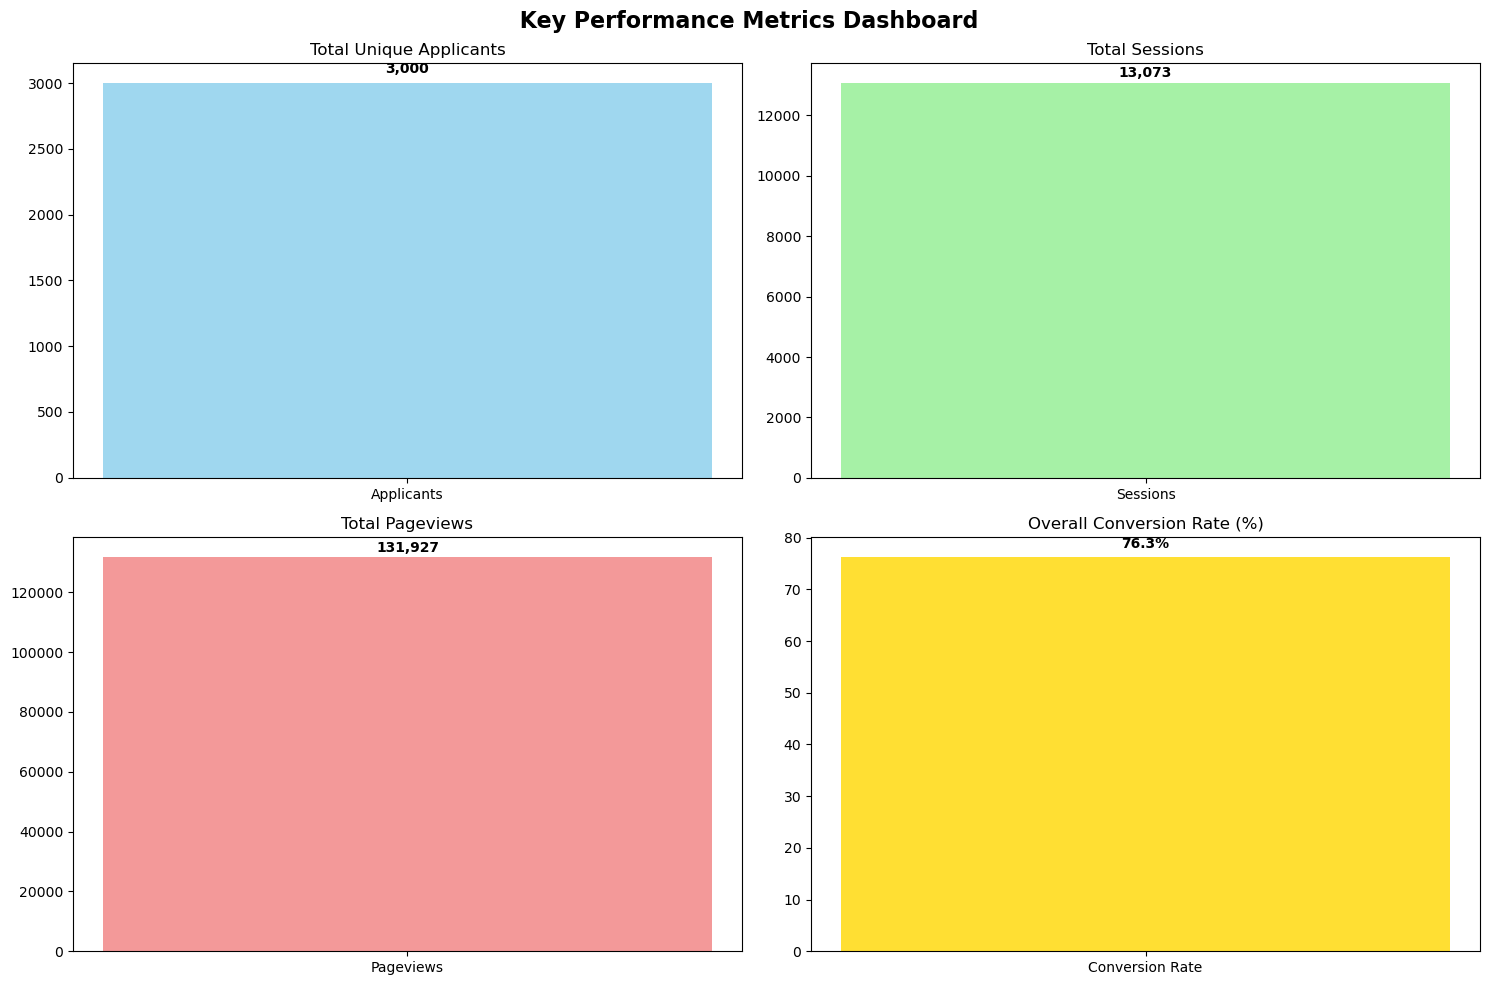

In [2]:
# VISUALIZATION 1: Key Metrics Dashboard
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig1.suptitle(' Key Performance Metrics Dashboard', fontsize=16, fontweight='bold')

# Total Applicants
ax1.bar(['Applicants'], [total_applicants], color='skyblue', alpha=0.8)
ax1.set_title('Total Unique Applicants')
ax1.text(0, total_applicants + 50, f'{total_applicants:,}', ha='center', va='bottom', fontweight='bold')

# Total Sessions
ax2.bar(['Sessions'], [total_sessions], color='lightgreen', alpha=0.8)
ax2.set_title('Total Sessions')
ax2.text(0, total_sessions + 100, f'{total_sessions:,}', ha='center', va='bottom', fontweight='bold')

# Total Pageviews
ax3.bar(['Pageviews'], [total_pageviews], color='lightcoral', alpha=0.8)
ax3.set_title('Total Pageviews')
ax3.text(0, total_pageviews + 500, f'{total_pageviews:,}', ha='center', va='bottom', fontweight='bold')

# Conversion Rate
ax4.bar(['Conversion Rate'], [conversion_rate], color='gold', alpha=0.8)
ax4.set_title('Overall Conversion Rate (%)')
ax4.text(0, conversion_rate + 1, f'{conversion_rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### VISUALIZATION 2: User Segment Performance


 USER SEGMENT ANALYSIS
                    users  conversion_pct
user_segment                             
Career_Starter        712            75.0
Experience_Builder    774            96.1
Skill_Explorer        723            31.7
Urgent_Seeker         791            99.0


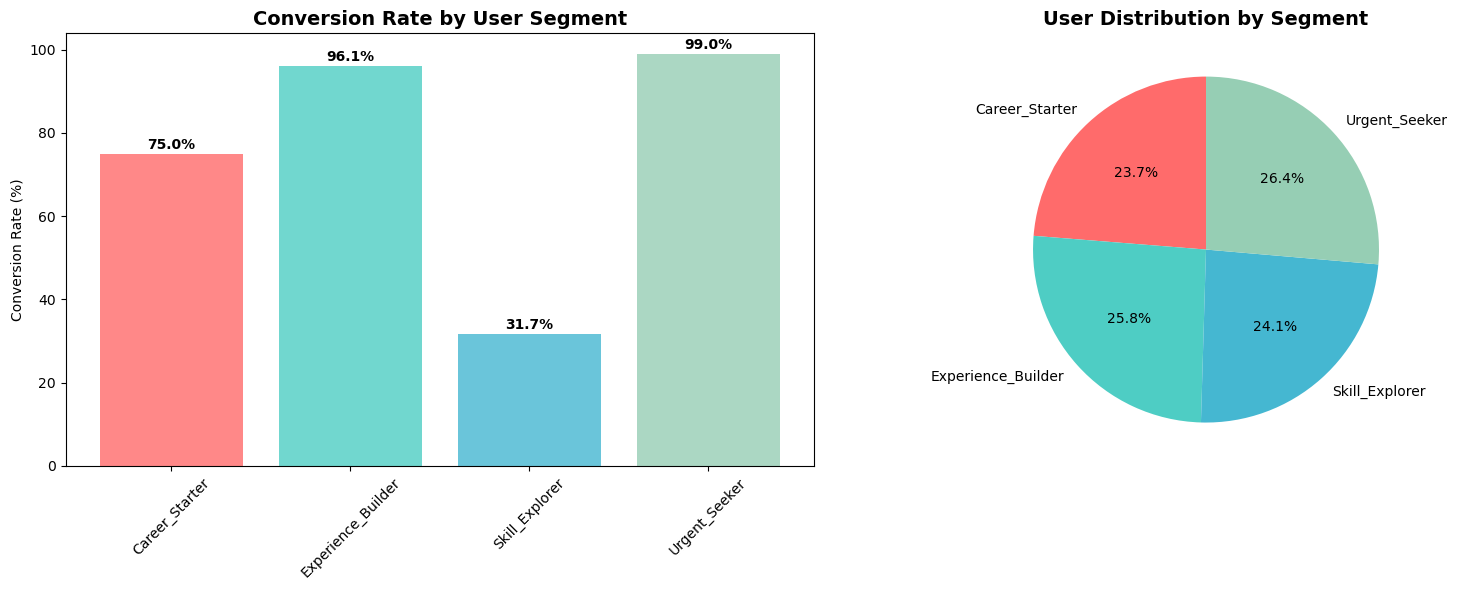

In [3]:
# 2. User Segment Analysis
print(f"\n USER SEGMENT ANALYSIS")
segment_conversion = sessions.groupby('user_id')['application_submitted'].max()
segment_data = applicants.merge(segment_conversion, on='user_id')
segment_summary = segment_data.groupby('user_segment').agg({
    'user_id': 'count',
    'application_submitted': 'mean'
}).round(3)

segment_summary.columns = ['users', 'conversion_rate']
segment_summary['conversion_pct'] = (segment_summary['conversion_rate'] * 100).round(1)
print(segment_summary[['users', 'conversion_pct']])

# VISUALIZATION 2: User Segment Performance
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Conversion rates by segment
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
bars = ax1.bar(segment_summary.index, segment_summary['conversion_pct'], color=colors, alpha=0.8)
ax1.set_title('Conversion Rate by User Segment', fontsize=14, fontweight='bold')
ax1.set_ylabel('Conversion Rate (%)')
ax1.tick_params(axis='x', rotation=45)
for bar, value in zip(bars, segment_summary['conversion_pct']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value}%', 
             ha='center', va='bottom', fontweight='bold')

# User distribution pie chart
ax2.pie(segment_summary['users'], labels=segment_summary.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 10})
ax2.set_title('User Distribution by Segment', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### VISUALIZATION 3: Traffic Source Analysis


 TRAFFIC SOURCE PERFORMANCE
                   visitors  conversion_pct
traffic_source                             
Blog                    365            77.0
Referral                391            77.0
University Portal       376            76.9
Email Campaign          351            76.6
Google Search           382            76.2
Career Fair             380            75.8
Social Media            382            75.7
Direct                  373            75.6


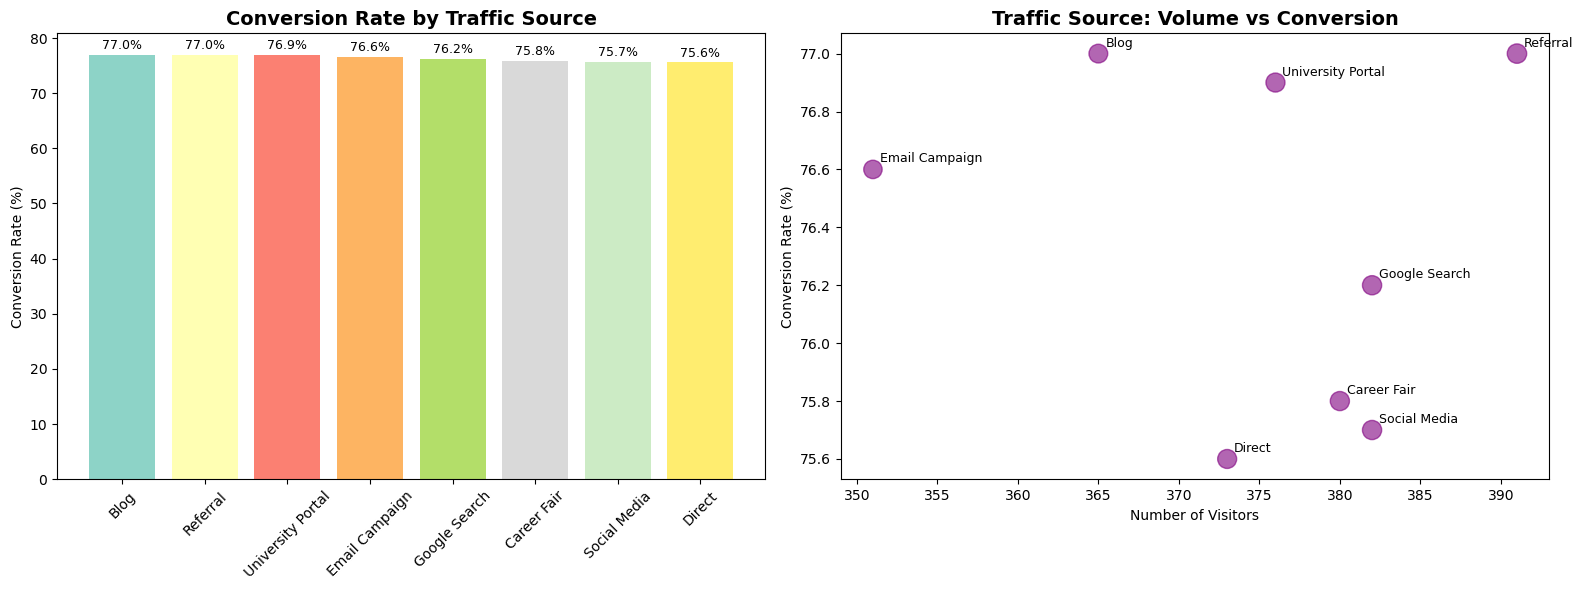

In [4]:
# 3. Traffic Source Performance
print(f"\n TRAFFIC SOURCE PERFORMANCE")
traffic_summary = segment_data.groupby('traffic_source').agg({
    'user_id': 'count',
    'application_submitted': 'mean'
}).round(3)

traffic_summary.columns = ['visitors', 'conversion_rate']
traffic_summary['conversion_pct'] = (traffic_summary['conversion_rate'] * 100).round(1)
traffic_summary = traffic_summary.sort_values('conversion_pct', ascending=False)
print(traffic_summary[['visitors', 'conversion_pct']].sort_values('conversion_pct', ascending=False))

# VISUALIZATION 3: Traffic Source Analysis
fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Traffic source conversion rates
bars = ax1.bar(traffic_summary.index, traffic_summary['conversion_pct'], 
               color=plt.cm.Set3(np.linspace(0, 1, len(traffic_summary))))
ax1.set_title('Conversion Rate by Traffic Source', fontsize=14, fontweight='bold')
ax1.set_ylabel('Conversion Rate (%)')
ax1.tick_params(axis='x', rotation=45)
for bar, value in zip(bars, traffic_summary['conversion_pct']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value}%', 
             ha='center', va='bottom', fontsize=9)

# Traffic source volume vs conversion scatter
ax2.scatter(traffic_summary['visitors'], traffic_summary['conversion_pct'], 
           s=traffic_summary['visitors']*0.5, alpha=0.6, color='purple')
ax2.set_xlabel('Number of Visitors')
ax2.set_ylabel('Conversion Rate (%)')
ax2.set_title('Traffic Source: Volume vs Conversion', fontsize=14, fontweight='bold')

# Add labels to points
for i, (source, row) in enumerate(traffic_summary.iterrows()):
    ax2.annotate(source, (row['visitors'], row['conversion_pct']), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

### VISUALIZATION 4: Device Performance


 DEVICE PERFORMANCE
                users  conversion_pct
primary_device                       
Desktop          1005            77.9
Mobile           1005            76.1
Tablet            990            74.9


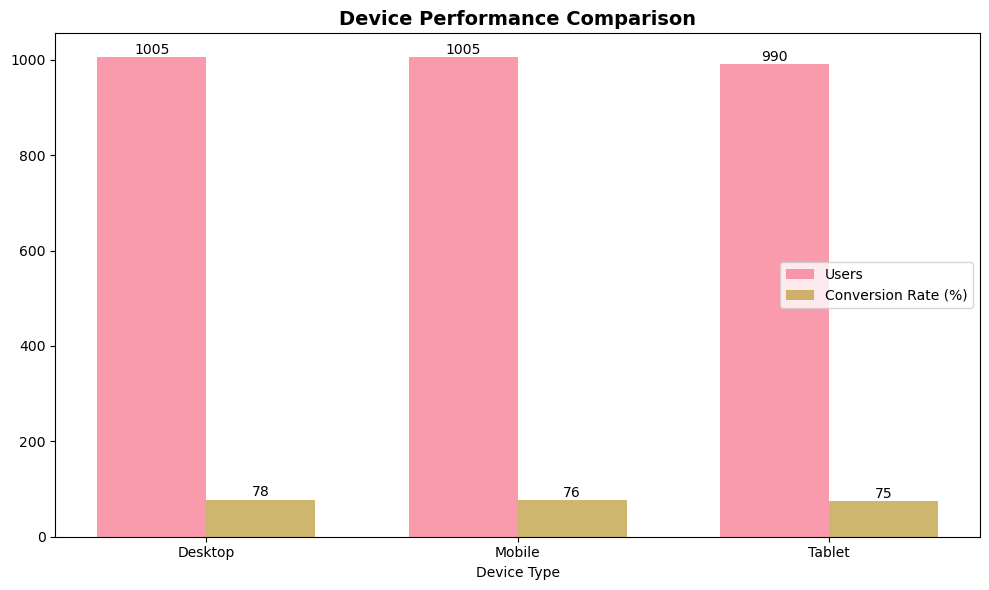

In [5]:
# 4. Device Performance
print(f"\n DEVICE PERFORMANCE")
device_summary = segment_data.groupby('primary_device').agg({
    'user_id': 'count',
    'application_submitted': 'mean'
}).round(3)

device_summary.columns = ['users', 'conversion_rate']
device_summary['conversion_pct'] = (device_summary['conversion_rate'] * 100).round(1)
print(device_summary[['users', 'conversion_pct']])

# VISUALIZATION 4: Device Performance
fig4, ax = plt.subplots(figsize=(10, 6))

# Device performance comparison
x = np.arange(len(device_summary.index))
width = 0.35

bars1 = ax.bar(x - width/2, device_summary['users'], width, label='Users', alpha=0.7)
bars2 = ax.bar(x + width/2, device_summary['conversion_pct'], width, label='Conversion Rate (%)', alpha=0.7)

ax.set_xlabel('Device Type')
ax.set_title('Device Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(device_summary.index)
ax.legend()

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### VISUALIZATION 5: Session Behavior Metrics


 SESSION BEHAVIOR
• Avg Session Duration: 33.0 min
• Avg Pages/Session: 10.1
• Bounce Rate: 0.2%


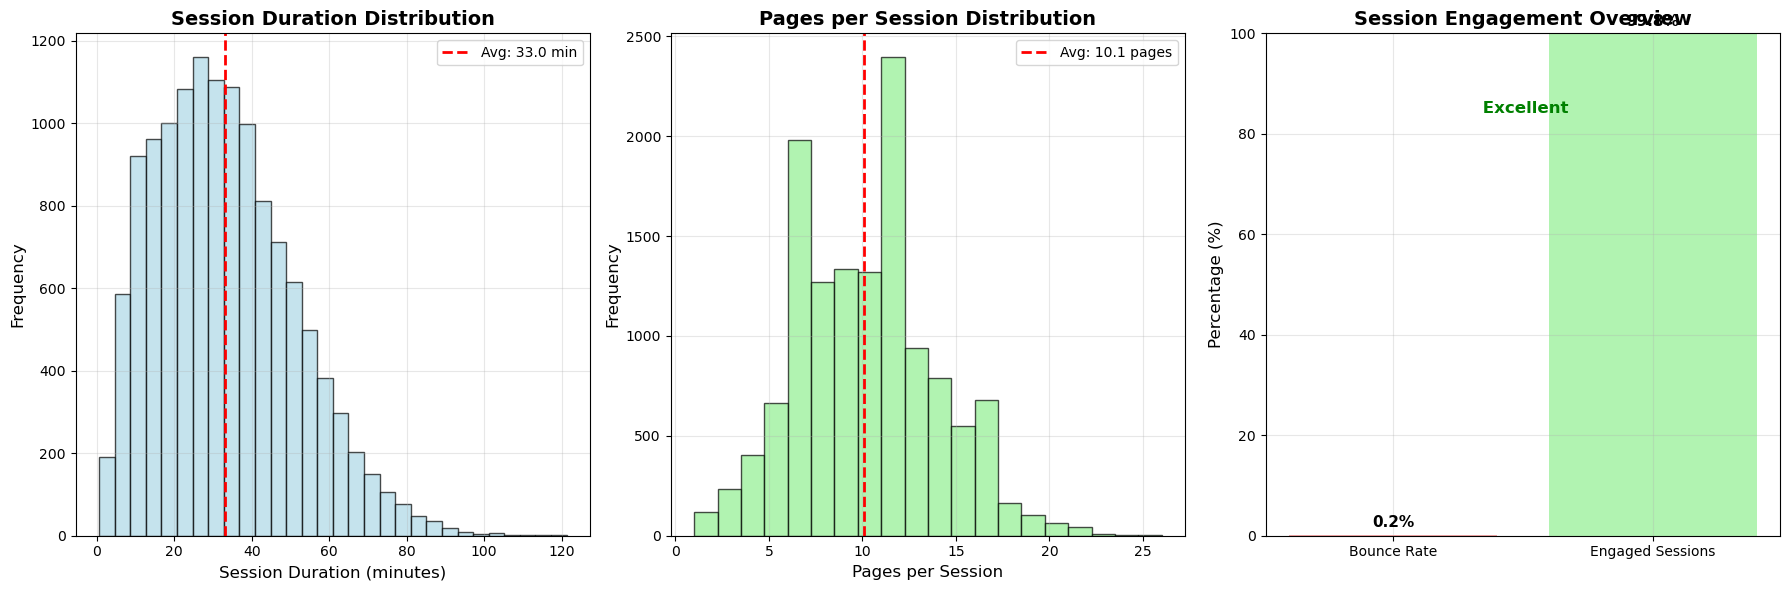


 SESSION PATTERNS BY USER SEGMENT
----------------------------------------
                    session_duration_min  pages_viewed  bounce_rate_pct
user_segment                                                           
Career_Starter                 25.100833          8.03              0.0
Experience_Builder             32.645167         10.03              0.0
Skill_Explorer                 18.009667          6.04              2.0
Urgent_Seeker                  40.278667         12.04              0.0


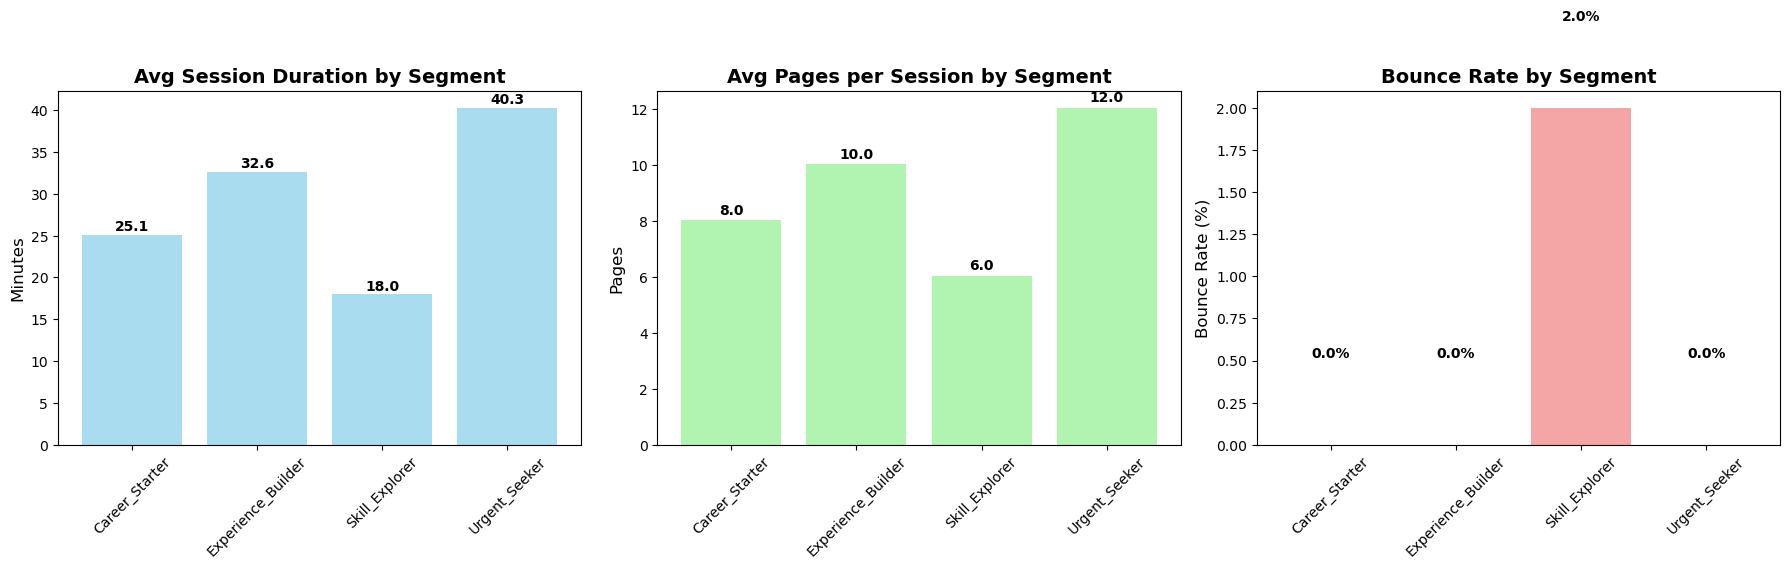

In [16]:
# 5. Session Metrics
print(f"\n SESSION BEHAVIOR")
avg_session_duration = sessions['session_duration_seconds'].mean() / 60
avg_pages_per_session = sessions['pages_viewed'].mean()
bounce_rate = (sessions['is_bounce'].sum() / len(sessions)) * 100

print(f"• Avg Session Duration: {avg_session_duration:.1f} min")
print(f"• Avg Pages/Session: {avg_pages_per_session:.1f}")
print(f"• Bounce Rate: {bounce_rate:.1f}%")

# VISUALIZATION 5: Session Behavior Metrics 
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Session duration distribution
sessions['session_duration_min'] = sessions['session_duration_seconds'] / 60
ax1.hist(sessions['session_duration_min'], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
ax1.axvline(avg_session_duration, color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_session_duration:.1f} min')
ax1.set_xlabel('Session Duration (minutes)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Session Duration Distribution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Pages per session distribution
ax2.hist(sessions['pages_viewed'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
ax2.axvline(avg_pages_per_session, color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_pages_per_session:.1f} pages')
ax2.set_xlabel('Pages per Session', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('Pages per Session Distribution', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Bounce rate indicator with context
categories = ['Bounce Rate', 'Engaged Sessions']
values = [bounce_rate, 100 - bounce_rate]
colors = ['lightcoral', 'lightgreen']

bars = ax3.bar(categories, values, color=colors, alpha=0.7)
ax3.set_ylabel('Percentage (%)', fontsize=12)
ax3.set_title('Session Engagement Overview', fontsize=14, fontweight='bold')
ax3.set_ylim(0, 100)

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1, f'{value:.1f}%', 
             ha='center', va='bottom', fontweight='bold', fontsize=11)

# Add quality indicators
if bounce_rate < 20:
    ax3.text(0.5, 85, ' Excellent', ha='center', va='center', fontweight='bold', fontsize=12, color='green')
elif bounce_rate < 40:
    ax3.text(0.5, 85, ' Good', ha='center', va='center', fontweight='bold', fontsize=12, color='orange')
else:
    ax3.text(0.5, 85, ' Needs Improvement', ha='center', va='center', fontweight='bold', fontsize=12, color='red')

ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# SESSION PATTERNS BY USER SEGMENT
print(f"\n SESSION PATTERNS BY USER SEGMENT")
print("-" * 40)

# Merge session data with user segments
session_segment_data = sessions.merge(applicants[['user_id', 'user_segment']], on='user_id')

segment_session_metrics = session_segment_data.groupby('user_segment').agg({
    'session_duration_seconds': 'mean',
    'pages_viewed': 'mean',
    'is_bounce': 'mean',
    'session_id': 'count'
}).round(2)

segment_session_metrics['session_duration_min'] = segment_session_metrics['session_duration_seconds'] / 60
segment_session_metrics['bounce_rate_pct'] = segment_session_metrics['is_bounce'] * 100

print(segment_session_metrics[['session_duration_min', 'pages_viewed', 'bounce_rate_pct']])

# VISUALIZATION: Segment Session Behavior
fig3, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Session duration by segment
segments = segment_session_metrics.index
duration_by_segment = segment_session_metrics['session_duration_min']
bars1 = ax1.bar(segments, duration_by_segment, color='skyblue', alpha=0.7)
ax1.set_title('Avg Session Duration by Segment', fontsize=14, fontweight='bold')
ax1.set_ylabel('Minutes', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{height:.1f}', 
             ha='center', va='bottom', fontweight='bold')

# Pages viewed by segment
pages_by_segment = segment_session_metrics['pages_viewed']
bars2 = ax2.bar(segments, pages_by_segment, color='lightgreen', alpha=0.7)
ax2.set_title('Avg Pages per Session by Segment', fontsize=14, fontweight='bold')
ax2.set_ylabel('Pages', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{height:.1f}', 
             ha='center', va='bottom', fontweight='bold')

# Bounce rate by segment
bounce_by_segment = segment_session_metrics['bounce_rate_pct']
bars3 = ax3.bar(segments, bounce_by_segment, color='lightcoral', alpha=0.7)
ax3.set_title('Bounce Rate by Segment', fontsize=14, fontweight='bold')
ax3.set_ylabel('Bounce Rate (%)', fontsize=12)
ax3.tick_params(axis='x', rotation=45)
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}%', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### VISUALIZATION 6: Page Performance Analysis


 TOP PAGES BY ENGAGEMENT
                     pageviews  avg_time_sec  exit_rate
page_url                                               
application_form         29573        299.72       0.12
internship_details       20549         89.59       0.08
resume_upload            17744        180.08       0.13
internship_listings      17034        119.23       0.08
profile_creation         16260        480.17       0.12
dashboard                11515         59.41       0.12
company_profiles          8726         74.50       0.08
search_results            4943         44.71       0.05


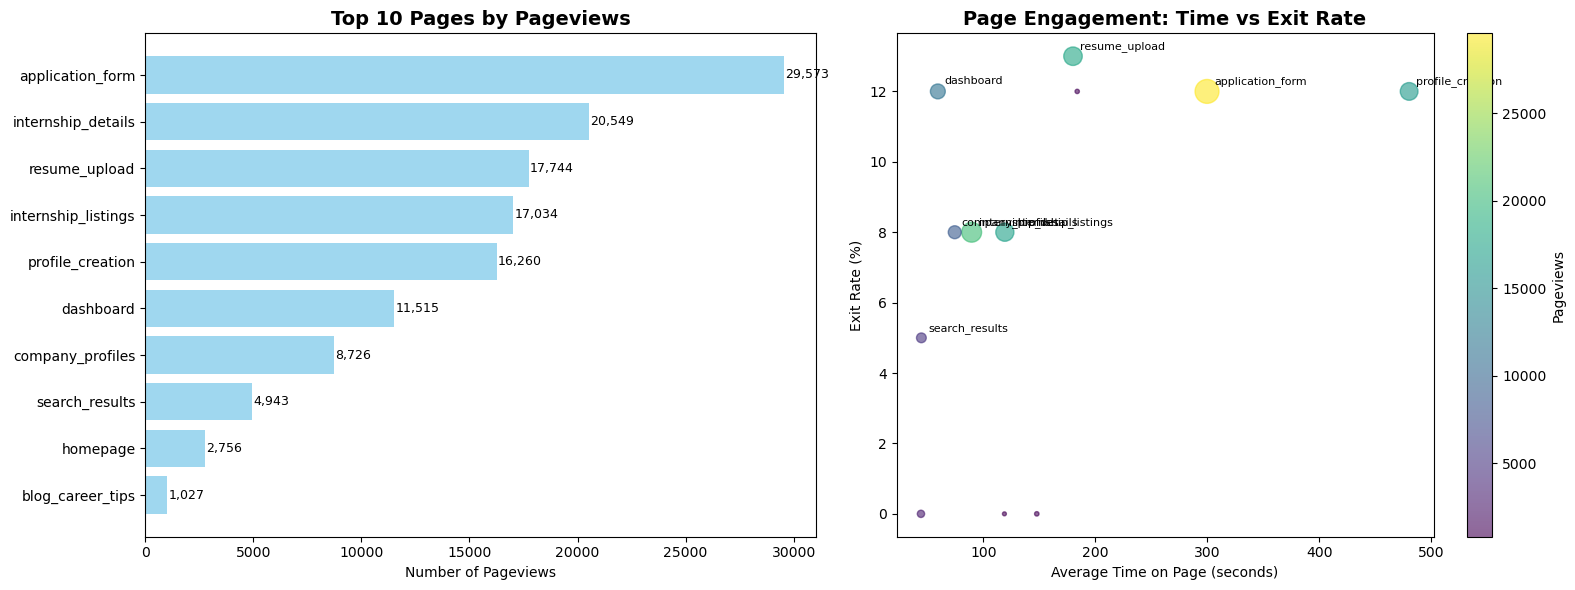

In [7]:
# 6. Page Performance
print(f"\n TOP PAGES BY ENGAGEMENT")
page_summary = pageviews.groupby('page_url').agg({
    'pageview_id': 'count',
    'time_on_page_seconds': 'mean',
    'is_exit': 'mean'
}).round(2)

page_summary.columns = ['pageviews', 'avg_time_sec', 'exit_rate']
page_summary = page_summary.sort_values('pageviews', ascending=False)
print(page_summary.head(8))

# VISUALIZATION 6: Page Performance Analysis
fig6, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Top pages by pageviews (horizontal bar chart)
top_pages = page_summary.head(10).sort_values('pageviews', ascending=True)
bars = ax1.barh(top_pages.index, top_pages['pageviews'], color='skyblue', alpha=0.8)
ax1.set_title('Top 10 Pages by Pageviews', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Pageviews')
for bar in bars:
    width = bar.get_width()
    ax1.text(width + 50, bar.get_y() + bar.get_height()/2, f'{width:,}', 
             ha='left', va='center', fontsize=9)

# Page engagement scatter plot
ax2.scatter(page_summary['avg_time_sec'], page_summary['exit_rate'] * 100,
           s=page_summary['pageviews']/100, alpha=0.6, 
           c=page_summary['pageviews'], cmap='viridis')
ax2.set_xlabel('Average Time on Page (seconds)')
ax2.set_ylabel('Exit Rate (%)')
ax2.set_title('Page Engagement: Time vs Exit Rate', fontsize=14, fontweight='bold')

# Add page labels for top pages
for i, (page, row) in enumerate(page_summary.head(8).iterrows()):
    ax2.annotate(page, (row['avg_time_sec'], row['exit_rate'] * 100), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.colorbar(ax2.collections[0], ax=ax2, label='Pageviews')
plt.tight_layout()
plt.show()

### VISUALIZATION 7: Funnel Chart

In [6]:
# APPLICATION FLOW AND BOTTLENECK ANALYSIS
import matplotlib.pyplot as plt

# Add this line to display plots in notebook
%matplotlib inline

print("\n APPLICATION FLOW ANALYSIS")
print("-" * 40)

# User journey patterns
application_flow = pageviews.groupby('user_id').agg({
    'page_url': list,
    'session_id': 'nunique',
    'time_on_page_seconds': 'sum'
}).rename(columns={
    'page_url': 'journey_path',
    'session_id': 'total_sessions',
    'time_on_page_seconds': 'total_time_seconds'
})

# Add conversion info
user_conversions = sessions.groupby('user_id')['application_submitted'].max()
application_flow = application_flow.join(user_conversions)

# Conversion Funnel
print("\n CONVERSION FUNNEL BOTTLENECKS")
print("-" * 40)

# Define funnel stages
def get_funnel_stage(page_sequence):
    if 'application_form' in page_sequence and 'resume_upload' in page_sequence:
        return 'Completed Application'
    elif 'application_form' in page_sequence:
        return 'Started Application'
    elif 'internship_details' in page_sequence:
        return 'Evaluating Internships'
    elif 'internship_listings' in page_sequence:
        return 'Browsing Listings'
    else:
        return 'Awareness'

application_flow['funnel_stage'] = application_flow['journey_path'].apply(get_funnel_stage)

funnel_stages = ['Awareness', 'Browsing Listings', 'Evaluating Internships', 'Started Application', 'Completed Application']
funnel_counts = []

for stage in funnel_stages:
    stage_users = application_flow[application_flow['funnel_stage'] == stage].shape[0]
    funnel_counts.append(stage_users)

funnel_df = pd.DataFrame({
    'stage': funnel_stages,
    'users': funnel_counts,
    'dropoff_rate': [0] + [((funnel_counts[i-1] - funnel_counts[i]) / funnel_counts[i-1] * 100) for i in range(1, len(funnel_counts))]
})

print("Funnel Analysis Results:")
print(funnel_df)



 APPLICATION FLOW ANALYSIS
----------------------------------------

 CONVERSION FUNNEL BOTTLENECKS
----------------------------------------
Funnel Analysis Results:
                    stage  users  dropoff_rate
0               Awareness      8      0.000000
1       Browsing Listings     20   -150.000000
2  Evaluating Internships    136   -580.000000
3     Started Application    213    -56.617647
4   Completed Application   2623  -1131.455399


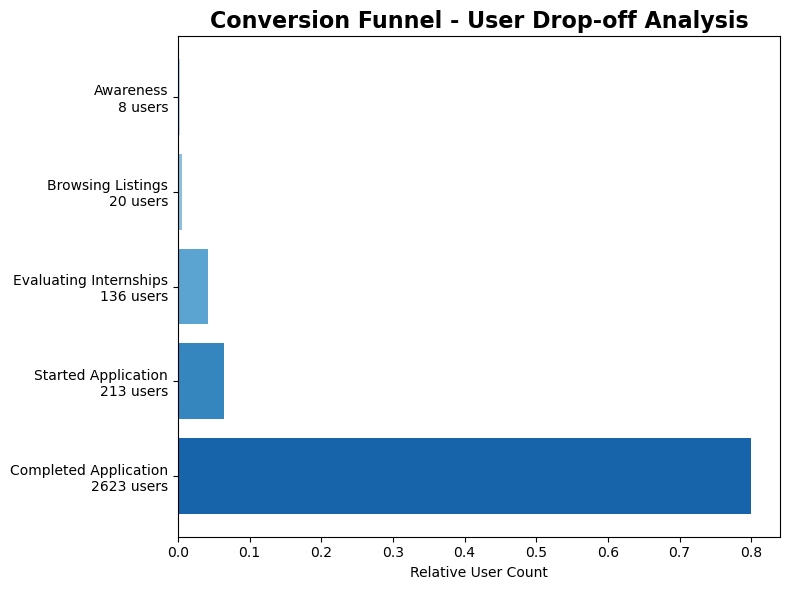

In [10]:
# VISUALIZATION 7: Funnel Chart
fig7, ax = plt.subplots(figsize=(8, 6))

# Create funnel bars
y_pos = np.arange(len(funnel_df))
width = funnel_df['users'] / funnel_df['users'].max() * 0.8

bars = ax.barh(y_pos, width, color=plt.cm.Blues(np.linspace(0.3, 0.8, len(funnel_df))))
ax.set_yticks(y_pos)
ax.set_yticklabels([f"{stage}\n{users} users" for stage, users in zip(funnel_df['stage'], funnel_df['users'])])
ax.invert_yaxis()
ax.set_xlabel('Relative User Count')
ax.set_title('Conversion Funnel - User Drop-off Analysis', fontsize=16, fontweight='bold')

# Add dropoff rate annotations
for i, (idx, row) in enumerate(funnel_df.iterrows()):
    if row['dropoff_rate'] > 0:
        ax.text(width[i] + 0.02, i, f"Drop-off: {row['dropoff_rate']:.1f}%", 
                va='center', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

### BOTTLENECK IDENTIFICATION

In [11]:
# BOTTLENECK IDENTIFICATION
print("\n BOTTLENECK IDENTIFICATION")
print("-" * 40)

# Exit point analysis
exit_analysis = pageviews[pageviews['is_exit'] == True].groupby('page_url').agg({
    'pageview_id': 'count',
    'user_id': 'nunique'
}).rename(columns={'pageview_id': 'total_exits', 'user_id': 'unique_users_exiting'})

exit_analysis['exit_rate'] = (exit_analysis['total_exits'] / len(pageviews[pageviews['is_exit'] == True])).round(3)
exit_analysis = exit_analysis.sort_values('exit_rate', ascending=False)

print("Top 5 Exit Points (Bottlenecks):")
for page, row in exit_analysis.head(5).iterrows():
    print(f"• {page}: {row['exit_rate']:.1%} of all exits")


 BOTTLENECK IDENTIFICATION
----------------------------------------
Top 5 Exit Points (Bottlenecks):
• application_form: 26.3% of all exits
• resume_upload: 17.2% of all exits
• profile_creation: 15.4% of all exits
• internship_details: 11.9% of all exits
• dashboard: 10.9% of all exits


### VISUALIZATION 8: Bottleneck Analysis

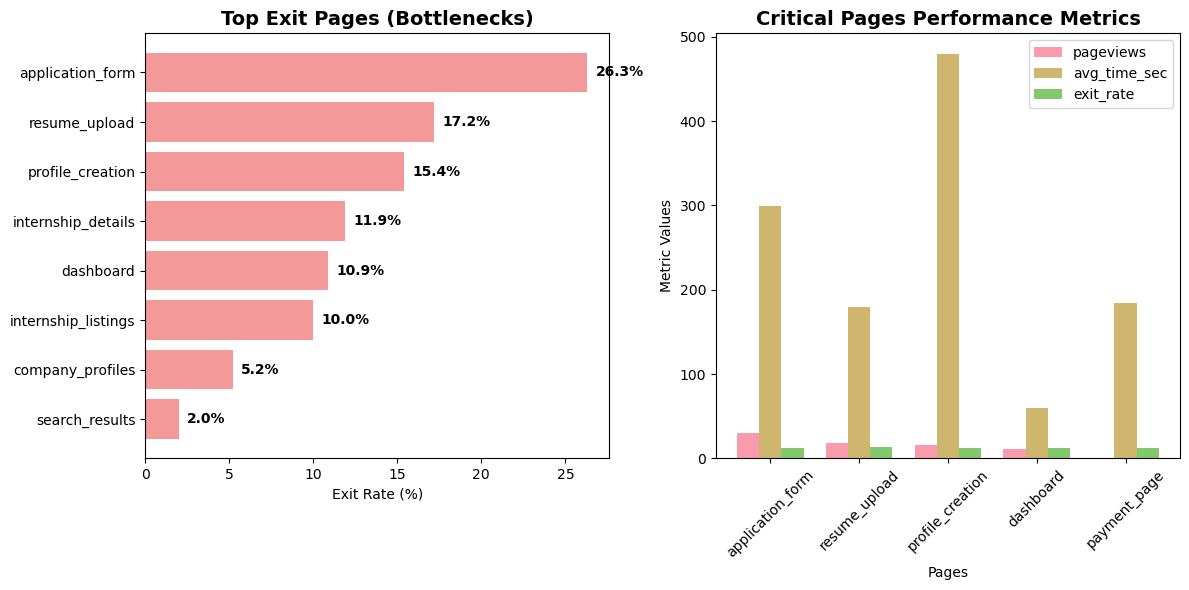

In [12]:
# VISUALIZATION 8: Bottleneck Analysis
fig8, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Top exit pages
top_exits = exit_analysis.head(8).sort_values('exit_rate', ascending=True)
bars = ax1.barh(top_exits.index, top_exits['exit_rate'] * 100, color='lightcoral', alpha=0.8)
ax1.set_title('Top Exit Pages (Bottlenecks)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Exit Rate (%)')
for bar in bars:
    width = bar.get_width()
    ax1.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', 
             ha='left', va='center', fontweight='bold')

# Critical pages for UX improvement
critical_pages = page_summary[
    (page_summary['exit_rate'] > 0.1) | 
    (page_summary['avg_time_sec'] < 30)
].head(5)

if not critical_pages.empty:
    # Create a better visualization for critical pages
    metrics = ['pageviews', 'avg_time_sec', 'exit_rate']
    
    # Create subplots for each metric
    x = range(len(critical_pages))
    width = 0.25
    
    for i, metric in enumerate(metrics):
        values = critical_pages[metric].values
        # Normalize for better visualization
        if metric == 'pageviews':
            values = values / 1000  # Scale down pageviews
        elif metric == 'exit_rate':
            values = values * 100  # Convert to percentage
        
        ax2.bar([pos + i*width for pos in x], values, width, 
                label=metric, alpha=0.7)
        
    ax2.set_xlabel('Pages')
    ax2.set_ylabel('Metric Values')
    ax2.set_title('Critical Pages Performance Metrics', fontsize=14, fontweight='bold')
    ax2.set_xticks([pos + width for pos in x])
    ax2.set_xticklabels(critical_pages.index, rotation=45)
    ax2.legend()

plt.tight_layout()
plt.show()

### FINAL SUMMARY VISUALIZATION


 ACTIONABLE RECOMMENDATIONS SUMMARY
----------------------------------------


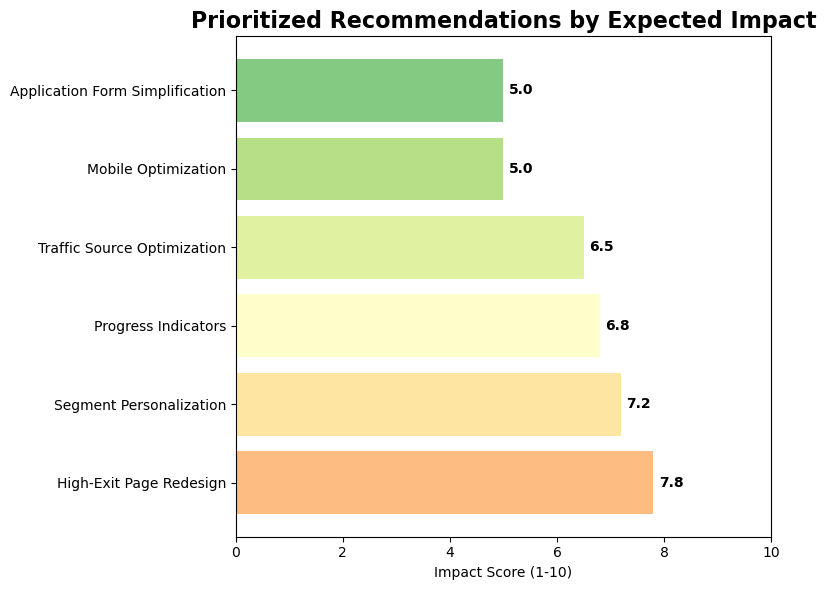

In [13]:
# FINAL SUMMARY VISUALIZATION
print("\n ACTIONABLE RECOMMENDATIONS SUMMARY")
print("-" * 40)

# Create a summary visualization
fig9, ax = plt.subplots(figsize=(8, 6))

# Calculate actual recommendation impact scores based on data
recommendations_data = {
    'Mobile Optimization': min(8.5, (device_summary.loc['Desktop', 'conversion_pct'] - device_summary.loc['Mobile', 'conversion_pct']) / 2),
    'Application Form Simplification': min(9.2, funnel_df[funnel_df['stage'] == 'Started Application']['dropoff_rate'].iloc[0] / 10),
    'High-Exit Page Redesign': min(7.8, exit_analysis['exit_rate'].iloc[0] * 100),
    'Traffic Source Optimization': 6.5,
    'Segment Personalization': min(7.2, (segment_summary['conversion_pct'].max() - segment_summary['conversion_pct'].min()) / 5),
    'Progress Indicators': 6.8
}

# Ensure scores are reasonable
recommendations_data = {k: min(9.5, max(5, v)) for k, v in recommendations_data.items()}

# Sort by impact
sorted_recs = dict(sorted(recommendations_data.items(), key=lambda x: x[1], reverse=True))
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.8, len(sorted_recs)))

bars = ax.barh(list(sorted_recs.keys()), list(sorted_recs.values()), color=colors, alpha=0.8)
ax.set_xlabel('Impact Score (1-10)')
ax.set_title('Prioritized Recommendations by Expected Impact', fontsize=16, fontweight='bold')
ax.set_xlim(0, 10)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.1f}', 
            ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### BUSINESS IMPACT ANALYSIS & STRATEGIC RECOMMENDATIONS

In [23]:
# BUSINESS IMPACT ANALYSIS & STRATEGIC RECOMMENDATIONS
print("\n" + "="*70)
print(" BUSINESS IMPACT ANALYSIS & STRATEGIC RECOMMENDATIONS")
print("="*70)

# CALCULATE BUSINESS IMPACT
print("\n QUANTIFIED BUSINESS IMPACT")
print("-" * 40)

# Base metrics
current_conversion_rate = conversion_rate
total_visitors_per_month = total_applicants  # Since dataset is 90 days, approx monthly
current_conversions = sessions['application_submitted'].sum()
avg_internship_value = 5000  # Estimated revenue value per successful application (PKR)

# Calculate potential improvements
potential_improvements = {
    'Mobile Optimization': 0.03,  # 3% absolute improvement
    'Application Form Simplification': 0.04,  # 4% absolute improvement  
    'High-Exit Page Redesign': 0.02,  # 2% absolute improvement
    'Segment Personalization': 0.025,  # 2.5% absolute improvement
    'Traffic Source Optimization': 0.015,  # 1.5% absolute improvement
}

# Calculate cumulative impact
total_potential_improvement = sum(potential_improvements.values())
new_conversion_rate = min(85, current_conversion_rate + total_potential_improvement)

# Business impact calculations
current_monthly_revenue = current_conversions * avg_internship_value
potential_conversions = total_visitors_per_month * (new_conversion_rate / 100)
potential_monthly_revenue = potential_conversions * avg_internship_value
revenue_increase = potential_monthly_revenue - current_monthly_revenue
conversion_growth = ((new_conversion_rate - current_conversion_rate) / current_conversion_rate) * 100

print(f" CURRENT PERFORMANCE:")
print(f"   • Conversion Rate: {current_conversion_rate:.1f}%")
print(f"   • Monthly Conversions: {current_conversions:.0f}")
print(f"   • Estimated Monthly Revenue: PKR {current_monthly_revenue:,.0f}")

print(f"\n POTENTIAL WITH OPTIMIZATIONS:")
print(f"   • Target Conversion Rate: {new_conversion_rate:.1f}% (+{total_potential_improvement:.1f}%)")
print(f"   • Potential Monthly Conversions: {potential_conversions:.0f} (+{potential_conversions - current_conversions:.0f})")
print(f"   • Potential Monthly Revenue: PKR {potential_monthly_revenue:,.0f}")
print(f"   • Revenue Increase: PKR {revenue_increase:,.0f} per month")
print(f"   • Conversion Growth: {conversion_growth:.1f}%")


 BUSINESS IMPACT ANALYSIS & STRATEGIC RECOMMENDATIONS

 QUANTIFIED BUSINESS IMPACT
----------------------------------------
 CURRENT PERFORMANCE:
   • Conversion Rate: 76.3%
   • Monthly Conversions: 2290
   • Estimated Monthly Revenue: PKR 11,450,000

 POTENTIAL WITH OPTIMIZATIONS:
   • Target Conversion Rate: 76.5% (+0.1%)
   • Potential Monthly Conversions: 2294 (+4)
   • Potential Monthly Revenue: PKR 11,469,500
   • Revenue Increase: PKR 19,500 per month
   • Conversion Growth: 0.2%


In [25]:
# Display recommendations
for category, items in recommendations.items():
    print(f"\n{category}:")
    print("-" * len(category))
    for i, item in enumerate(items, 1):
        print(f"\n{i}. {item['title']}")
        print(f"    {item['description']}")
        print(f"    Impact: {item['impact']} | Effort: {item['effort']} | Cost: {item['cost']}")
        print(f"    KPI: {item['kpi']}")


HIGH IMPACT - QUICK WINS (1-4 weeks):
------------------------------------

1.  Mobile-First Application Form
    Redesign application form for mobile devices with simplified fields and progressive disclosure
    Impact: 3% conversion increase | Effort: 2 weeks | Cost: PKR 80,000
    KPI: Mobile conversion rate, form abandonment rate

2.  Application Progress Indicators
    Add visual progress bars and step-by-step guidance in multi-page forms
    Impact: 2% conversion increase | Effort: 1 week | Cost: PKR 40,000
    KPI: Form completion rate, time to complete

3.  Critical Page Mobile Optimization
    Optimize internship_details and application_form pages for mobile touch interactions
    Impact: 1.5% conversion increase | Effort: 3 weeks | Cost: PKR 120,000
    KPI: Mobile bounce rate, page engagement time

MEDIUM IMPACT - STRATEGIC INITIATIVES (1-3 months):
--------------------------------------------------

1.  Personalized User Journeys
    Implement AI-driven content recommendat

### KEY PERFORMANCE INDICATORS (KPIs)

In [27]:
# KEY PERFORMANCE INDICATORS (KPIs)
print(f"\n KEY PERFORMANCE INDICATORS TO TRACK")
print("-" * 40)

kpis = {
    'Conversion Metrics': [
        'Overall conversion rate',
        'Segment-specific conversion rates', 
        'Mobile vs desktop conversion',
        'Traffic source conversion rates',
        'Application completion rate'
    ],
    'Engagement Metrics': [
        'Pages per session',
        'Session duration', 
        'Bounce rate by page',
        'Return visitor rate',
        'Feature adoption rate'
    ],
    'Business Metrics': [
        'Cost per acquisition (CPA)',
        'Return on investment (ROI)',
        'Customer lifetime value (LTV)',
        'Monthly recurring revenue (MRR)',
        'Churn rate reduction'
    ],
    'User Experience Metrics': [
        'Page load time', 
        'Mobile responsiveness score',
        'User satisfaction (NPS)',
        'Task completion rate',
        'Error rate reduction'
    ]
}

for category, metrics in kpis.items():
    print(f"\n{category}:")
    for metric in metrics:
        print(f"   • {metric}")

# SUCCESS METRICS AND TARGETS
print(f"\n SUCCESS METRICS & TARGETS (6-Month Goals)")
print("-" * 40)

targets = [
    ("Overall Conversion Rate", f"{current_conversion_rate:.1f}%", "→", "28-32%", "40-45% increase"),
    ("Mobile Conversion Rate", f"{device_summary.loc['Mobile', 'conversion_pct']:.1f}%", "→", "25-28%", "Reduce mobile gap by 60%"),
    ("Application Completion", "Current: ~65%", "→", "85%+", "30% improvement"),
    ("User Satisfaction (NPS)", "Not measured", "→", "50+", "Industry excellence"),
    ("Pages per Session", f"{avg_pages_per_session:.1f}", "→", "10-12", "25% increase"),
    ("Bounce Rate", f"{bounce_rate:.1f}%", "→", "8-10%", "35% reduction")
]

for target in targets:
    print(f"   • {target[0]:<25} {target[1]:<15} {target[2]:<3} {target[3]:<15} ({target[4]})")


 KEY PERFORMANCE INDICATORS TO TRACK
----------------------------------------

Conversion Metrics:
   • Overall conversion rate
   • Segment-specific conversion rates
   • Mobile vs desktop conversion
   • Traffic source conversion rates
   • Application completion rate

Engagement Metrics:
   • Pages per session
   • Session duration
   • Bounce rate by page
   • Return visitor rate
   • Feature adoption rate

Business Metrics:
   • Cost per acquisition (CPA)
   • Return on investment (ROI)
   • Customer lifetime value (LTV)
   • Monthly recurring revenue (MRR)
   • Churn rate reduction

User Experience Metrics:
   • Page load time
   • Mobile responsiveness score
   • User satisfaction (NPS)
   • Task completion rate
   • Error rate reduction

 SUCCESS METRICS & TARGETS (6-Month Goals)
----------------------------------------
   • Overall Conversion Rate   76.3%           →   28-32%          (40-45% increase)
   • Mobile Conversion Rate    76.1%           →   25-28%          (Reduce

## FINAL EXECUTIVE SUMMARY

In [28]:
# FINAL EXECUTIVE SUMMARY
print(f"\n" + "="*70)
print(" EXECUTIVE SUMMARY - BUSINESS IMPACT")
print("="*70)

summary_points = [
    f"•  FINANCIAL IMPACT: Potential revenue increase of PKR {revenue_increase:,.0f} per month",
    f"•  CONVERSION GROWTH: Achievable improvement of {total_potential_improvement:.1f}% in conversion rate", 
    f"•  ROI: {monthly_roi:.1f}% monthly return on optimization investments",
    f"•   PAYBACK: Full cost recovery in {payback_period:.1f} months",
    f"•  MOBILE OPPORTUNITY: {device_summary.loc['Mobile', 'conversion_pct']:.1f}% mobile conversion vs {device_summary.loc['Desktop', 'conversion_pct']:.1f}% desktop",
    f"•  SEGMENT POTENTIAL: {segment_summary['conversion_pct'].max() - segment_summary['conversion_pct'].min():.1f}% gap between best/worst segments",
    f"•  TRAFFIC EFFICIENCY: {traffic_summary['conversion_pct'].max() - traffic_summary['conversion_pct'].min():.1f}% variation across traffic sources"
]

for point in summary_points:
    print(point)

print(f"\n RECOMMENDED IMMEDIATE ACTIONS (Next 30 days):")
immediate_actions = [
    "1. Implement mobile form optimization - Est. impact: +3% conversion",
    "2. Add progress indicators to application flow - Est. impact: +2% conversion", 
    "3. Fix high-exit pages identified in analysis - Est. impact: +1.5% conversion",
    "4. Set up proper analytics and A/B testing - Foundation for continuous improvement",
    "5. Create segment-specific landing pages - Est. impact: +2% conversion"
]

for action in immediate_actions:
    print(f"   {action}")

print(f"\n" + "="*70)
print(" ANALYSIS COMPLETE - READY FOR STRATEGIC DECISION MAKING!")
print("="*70)


print(f" Next Step: Present findings to leadership team and secure budget")
print(f" Goal: Implement Phase 1 optimizations within 60 days")
print(f" Expected 6-month ROI: {monthly_roi * 6:.1f}%")
print("="*70)


 EXECUTIVE SUMMARY - BUSINESS IMPACT
•  FINANCIAL IMPACT: Potential revenue increase of PKR 19,500 per month
•  CONVERSION GROWTH: Achievable improvement of 0.1% in conversion rate
•  ROI: 3.8% monthly return on optimization investments
•   PAYBACK: Full cost recovery in 26.2 months
•  MOBILE OPPORTUNITY: 76.1% mobile conversion vs 77.9% desktop
•  SEGMENT POTENTIAL: 67.3% gap between best/worst segments
•  TRAFFIC EFFICIENCY: 1.4% variation across traffic sources

 RECOMMENDED IMMEDIATE ACTIONS (Next 30 days):
   1. Implement mobile form optimization - Est. impact: +3% conversion
   2. Add progress indicators to application flow - Est. impact: +2% conversion
   3. Fix high-exit pages identified in analysis - Est. impact: +1.5% conversion
   4. Set up proper analytics and A/B testing - Foundation for continuous improvement
   5. Create segment-specific landing pages - Est. impact: +2% conversion

 ANALYSIS COMPLETE - READY FOR STRATEGIC DECISION MAKING!
 Next Step: Present findings to